In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = [
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1]
]

b = [
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0]
]

c = [
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0]
]


In [3]:
Y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])

In [4]:
X = np.array([
    np.array(a).reshape(1, 30),
    np.array(b).reshape(1, 30),
    np.array(c).reshape(1, 30)
]).reshape(3, 30)


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def f_forward(x, w1, w2):
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
    return a1, a2

In [7]:
def generate_wt(x, y):
    return np.random.randn(x, y)

In [8]:
def loss(pred, target):
    return np.mean(np.square(pred - target))

In [9]:
def back_prop(x, y, w1, w2, alpha):
    a1, a2 = f_forward(x, w1, w2)

    # Output layer error
    d2 = a2 - y

    # Hidden layer error
    d1 = np.dot(d2, w2.T) * a1 * (1 - a1)

    # Weight adjustments
    w2_adj = np.dot(a1.T, d2)
    w1_adj = np.dot(x.T, d1)

    # Update weights
    w1 -= alpha * w1_adj
    w2 -= alpha * w2_adj

    return w1, w2

In [10]:
def train(X, Y, w1, w2, alpha=0.1, epoch=100):
    acc_list = []
    loss_list = []
    for j in range(epoch):
        l = []
        for i in range(len(X)):
            _, out = f_forward(X[i].reshape(1, -1), w1, w2)
            l.append(loss(out, Y[i].reshape(1, -1)))
            w1, w2 = back_prop(X[i].reshape(1, -1), Y[i].reshape(1, -1), w1, w2, alpha)
        avg_loss = sum(l) / len(X)
        accuracy = (1 - avg_loss) * 100
        print(f"Epoch: {j+1} | Accuracy: {accuracy:.2f}% | Loss: {avg_loss:.4f}")
        acc_list.append(accuracy)
        loss_list.append(avg_loss)
    return acc_list, loss_list, w1, w2

In [20]:
def predict(x, w1, w2):
    _, out = f_forward(x.reshape(1, -1), w1, w2)
    pred_class = np.argmax(out)
    if pred_class == 0:
        print("Image is of Letter A")
    elif pred_class == 1:
        print("Image is of Letter B")
    else:
        print("Image is of Letter C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [21]:
w1 = generate_wt(30, 5)  # input -> hidden
w2 = generate_wt(5, 3)   # hidden -> output

In [22]:
# Train model
acc, loss_vals, w1, w2 = train(X, Y, w1, w2, alpha=0.1, epoch=200)

Epoch: 1 | Accuracy: 76.61% | Loss: 0.2339
Epoch: 2 | Accuracy: 77.42% | Loss: 0.2258
Epoch: 3 | Accuracy: 78.11% | Loss: 0.2189
Epoch: 4 | Accuracy: 78.71% | Loss: 0.2129
Epoch: 5 | Accuracy: 79.24% | Loss: 0.2076
Epoch: 6 | Accuracy: 79.72% | Loss: 0.2028
Epoch: 7 | Accuracy: 80.16% | Loss: 0.1984
Epoch: 8 | Accuracy: 80.55% | Loss: 0.1945
Epoch: 9 | Accuracy: 80.91% | Loss: 0.1909
Epoch: 10 | Accuracy: 81.24% | Loss: 0.1876
Epoch: 11 | Accuracy: 81.54% | Loss: 0.1846
Epoch: 12 | Accuracy: 81.81% | Loss: 0.1819
Epoch: 13 | Accuracy: 82.07% | Loss: 0.1793
Epoch: 14 | Accuracy: 82.31% | Loss: 0.1769
Epoch: 15 | Accuracy: 82.53% | Loss: 0.1747
Epoch: 16 | Accuracy: 82.74% | Loss: 0.1726
Epoch: 17 | Accuracy: 82.94% | Loss: 0.1706
Epoch: 18 | Accuracy: 83.13% | Loss: 0.1687
Epoch: 19 | Accuracy: 83.31% | Loss: 0.1669
Epoch: 20 | Accuracy: 83.49% | Loss: 0.1651
Epoch: 21 | Accuracy: 83.66% | Loss: 0.1634
Epoch: 22 | Accuracy: 83.82% | Loss: 0.1618
Epoch: 23 | Accuracy: 83.98% | Loss: 0.16


Testing predictions:
Image is of Letter A


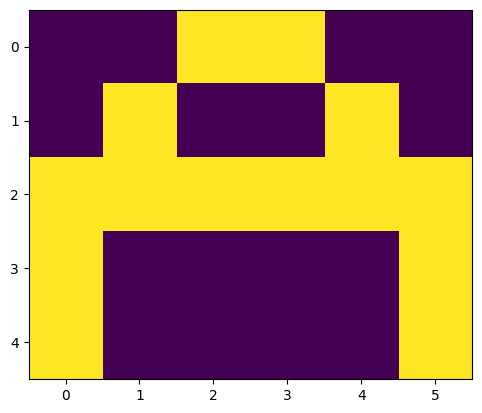

Image is of Letter B


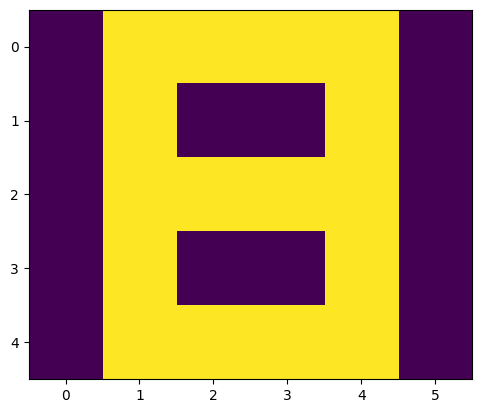

Image is of Letter C


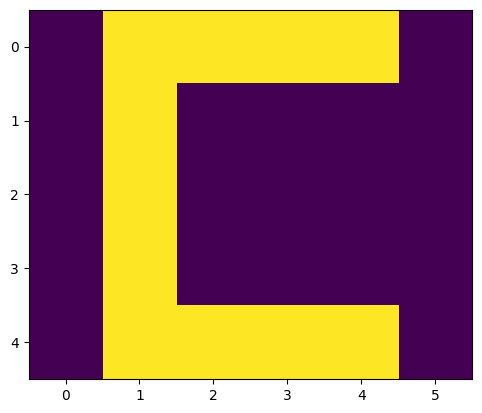

In [23]:
print("\nTesting predictions:")
predict(X[0], w1, w2)
predict(X[1], w1, w2)
predict(X[2], w1, w2)